Hackathon Topic: Forecasting Daily Emissions with Environmental Factors
Problem Statement:
Participants are invited to utilize historical Continuous Emissions Monitoring System (CEMS) data in conjunction with El Paso weather data to develop a predictive model for emissions levels at the Montana Units from January 1, 2024, to October 31, 2024. This exercise aims to elucidate the correlation between environmental conditions and emissions output, thereby enhancing participants’ understanding of how weather impacts daily emissions and honing their forecasting abilities.
The hackathon is structured into three tiers based on the participants’ experience levels:
•	Beginner: Teams will forecast emissions/load for a single day during the Peak Season (May through August).
•	Intermediate: Teams will predict emissions for three days: one day during the Peak Season (May through August) and two days during the Off-Peak Season (January through April and September through December).
•	Advanced: Teams will forecast emissions for three days for each unit: one day during the Peak Season (May through August) and two days during the Off-Peak Season (January through April and September through December). Additionally, teams will analyze the data to determine which unit operates more efficiently.
Challenge Details:
1.	Data Provided:
o	Time Period: CEMS and weather data covering October 28, 2021, to December 31, 2023.
o	Weather Variables: Daily weather metrics including average, minimum, and maximum temperatures (tavg, tmin, tmax), precipitation (prcp), snowfall (snow), wind direction (wdir), wind speed (wspd), and pressure (pres).
o	CEMS Emissions and Operational Metrics: Parameters include UNITONBT, SO2TONS, HEATINBA, NH3TONS, UNITONBA, HEAT_QA, HEATINBT, GFLOW_BA, NOXTONS, LOADMWBA, COTONS, and LOADMWBT.
2.	Objective:   
o	Build a Predictive Model: Create a model that forecasts daily emissions levels, specifically for key parameters like SO2TONS, NOXTONS, and COTONS, using both historical emissions data and weather data.
o	Identify Influencing Factors: Analyze which weather variables (e.g., temperature or wind speed) have the strongest correlations with emissions, providing insights into environmental impact on operational output.
o	Explain Predictions: Provide explanations or a feature importance ranking showing which variables most influence emissions levels, highlighting the role of external weather conditions in emissions forecasts.
3.	Expected Deliverables:
o	Predictive Model Output: Predictions for emissions from January 1, 2024, to October 31, 2024, along with an evaluation of the model’s accuracy.
o	Feature Importance Analysis: Report on which weather and operational parameters most influence emissions forecasts.
o	Visualization: Graphs or charts that demonstrate trends, predictions, and feature importance, including how weather patterns relate to emissions.
4.	Presentation and Data Storytelling:
o	Visualizations: Create clear, insightful visualizations to illustrate trends, predictions, and key findings. Students should aim to show the relationship between weather conditions and emissions levels and highlight the most significant factors influencing emissions predictions.
o	Storytelling: Develop a narrative that explains their approach, findings, and recommendations. This should include an overview of how they selected features, built their model, and the insights they uncovered about emissions patterns.
o	Real-World Application: Explain the potential impact of their findings in a real-world context. For example, they could discuss how their model could help operational teams anticipate emissions spikes and make proactive adjustments.
o	Clarity and Engagement: Present in a clear and engaging way, practicing professional presentation skills. This includes using visuals effectively, simplifying technical details, and focusing on the “why” behind their insights to make the analysis accessible to a broader audience.
5.	Learning Objectives:
o	Predictive Modeling with External Factors: Apply data science techniques to forecast emissions, integrating multi-variable datasets.
o	Correlative and Feature Importance Analysis: Understand how external conditions, such as weather, influence emissions and gain experience in identifying key predictors.
o	Environmental and Operational Insight: Develop awareness of how emissions are impacted by both operational and environmental factors, fostering skills in data-driven environmental decision-making.
o	Effective Communication: Practice explaining complex analyses and models in a way that non-technical stakeholders can understand and find value in.
o	Data Storytelling Techniques: Learn how to structure a narrative that turns data into insights, making it relevant and actionable.
o	Visualization Proficiency: Enhance skills in creating visualizations that not only represent data accurately but also support a compelling story.
This presentation component reinforces the importance of communication in analytics, giving students a well-rounded experience that mirrors real-world expectations.

Lake Power Station

Capacity:  353 Net Megawatts (Peak Period) (88.5 per Unit)
Location:  El Paso, Texas
Lake consists of four advanced simple cycle aero-derivative combustion turbines fueled by natural gas, the cleanest fossil fuel available (LAKE-1, LAKE-2, LAKE-3, & LAKE-4).  The units feature fuel-efficient turbine generation technology and are designed with best available environmental control technology.


Datasets:

[Data for Hackathon.xlsx](https://github.com/apownukepcc/datathon-spring-2025/blob/main/Data%20for%20Hackathon.xlsx)

[El Paso Daily Weather.csv](https://github.com/apownukepcc/datathon-spring-2025/blob/main/weather.csv)

[Parameters Meta Data.xlsx](https://github.com/apownukepcc/datathon-spring-2025/blob/main/Parameters%20Meta%20Data.xlsx)

Description

[Hackathon Topic - Forecasting Daily Emissions with Environmental Factors.docx](https://github.com/apownukepcc/datathon-spring-2025/blob/main/Hackathon%20Topic%20-%20Forecasting%20Daily%20Emissions%20with%20Environmental%20Factors.docx)

In [1]:
#
# Convert 'Data for Hackathon.xlsx' to 'emissions_data.csv'.
#
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define file paths
github_excel_url = "https://raw.githubusercontent.com/apownukepcc/datathon-spring-2025/main/Data%20for%20Hackathon.xlsx"
output_csv_file = "/content/drive/My Drive/emissions_data.csv"

# Load the Excel file from GitHub
try:
    df = pd.read_excel(github_excel_url)
    print("Excel file successfully loaded from GitHub.")
except Exception as e:
    print(f"Error loading Excel file from GitHub: {e}")
    exit()

# Save the data as a CSV file to Google Drive
try:
    df.to_csv(output_csv_file, index=False)
    print(f"CSV file saved to: {output_csv_file}")
except Exception as e:
    print(f"Error saving CSV file to Google Drive: {e}")


Mounted at /content/drive
Excel file successfully loaded from GitHub.
CSV file saved to: /content/drive/My Drive/emissions_data.csv


In [2]:
#
# Update format of the data
# Convert data format from '1/2/2022 0:00' to '1/2/2022'
#
import pandas as pd
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define file paths
github_url = "https://raw.githubusercontent.com/apownukepcc/datathon-spring-2025/main/emissions_data.csv"
output_file = "/content/drive/My Drive/emissions_data_updated.csv"

# Load the emissions data from GitHub
try:
    emissions_data = pd.read_csv(github_url)
    print("File successfully loaded from GitHub.")
except Exception as e:
    print(f"Error loading file from GitHub: {e}")
    exit()

# Remove time part ("0:00") from the 'TimeStamp' column
if 'TimeStamp' in emissions_data.columns:
    emissions_data['TimeStamp'] = emissions_data['TimeStamp'].str.replace(r"\s0:00", "", regex=True)
    print("'TimeStamp' column cleaned.")
else:
    print("The column 'TimeStamp' was not found in the file.")
    exit()

# Save the updated file to Google Drive
try:
    emissions_data.to_csv(output_file, index=False)
    print(f"Updated emissions data saved to: {output_file}")
except Exception as e:
    print(f"Error saving file to Google Drive: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File successfully loaded from GitHub.
'TimeStamp' column cleaned.
Updated emissions data saved to: /content/drive/My Drive/emissions_data_updated.csv


In [3]:
#
# Combine datasets 'emissions_data_updated.csv' and 'weather.csv' to 'combined_data.csv'.
#
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define file paths
github_emissions_url = "https://raw.githubusercontent.com/apownukepcc/datathon-spring-2025/main/emissions_data_updated.csv"
github_weather_url = "https://raw.githubusercontent.com/apownukepcc/datathon-spring-2025/main/weather.csv"
output_file = "/content/drive/My Drive/combined_data.csv"

# Load the emissions data from GitHub
try:
    emissions_data = pd.read_csv(github_emissions_url)
    print("Emissions data successfully loaded from GitHub.")
except Exception as e:
    print(f"Error loading emissions data from GitHub: {e}")
    exit()

# Load the weather data from GitHub
try:
    weather_data = pd.read_csv(github_weather_url)
    print("Weather data successfully loaded from GitHub.")
except Exception as e:
    print(f"Error loading weather data from GitHub: {e}")
    exit()

# Standardize column names for merging
emissions_data = emissions_data.rename(columns={"TimeStamp": "date"})

# Merge the datasets on the 'date' column
combined_data = pd.merge(emissions_data, weather_data, on="date", how="inner")

# Save the combined data to Google Drive
try:
    combined_data.to_csv(output_file, index=False)
    print(f"Combined data saved to: {output_file}")
except Exception as e:
    print(f"Error saving combined data to Google Drive: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Emissions data successfully loaded from GitHub.
Weather data successfully loaded from GitHub.
Combined data saved to: /content/drive/My Drive/combined_data.csv


In [4]:
#
# Convert 'combined_data.csv' to 'SO2TONS_dataset.csv', 'NOXTONS_dataset.csv', 'COTONS_dataset.csv'.
#
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define file paths
github_url = "https://raw.githubusercontent.com/apownukepcc/datathon-spring-2025/main/combined_data.csv"
output_so2tons_file = "/content/drive/My Drive/SO2TONS_dataset.csv"
output_noxtons_file = "/content/drive/My Drive/NOXTONS_dataset.csv"
output_cotons_file = "/content/drive/My Drive/COTONS_dataset.csv"

# Load the dataset from GitHub
try:
    data = pd.read_csv(github_url)
    print("Dataset successfully loaded from GitHub.")
except Exception as e:
    print(f"Error loading dataset from GitHub: {e}")
    exit()

# Define the emissions parameters
emissions_params = ['SO2TONS', 'NOXTONS', 'COTONS']
load_param = 'LOADMWBA'

# Step 1: Separate emissions and load data
emissions_data = data[data['Parameter'].isin(emissions_params)]
load_data = data[data['Parameter'] == load_param]

# Step 2: Merge emissions and load data based on 'date' and 'Source'
merged_data = pd.merge(
    emissions_data,
    load_data,
    on=["date", "Source"],
    suffixes=("_emission", "_load"),
    how="left"
)

# Step 3: Calculate Emissions_Load
merged_data["Emissions_Load"] = merged_data["Value_emission"] / merged_data["Value_load"]

# Step 4: Add Emissions_Load back to the original dataset
data_with_emissions_load = pd.merge(
    data,
    merged_data[["date", "Source", "Parameter_emission", "Emissions_Load"]],
    left_on=["date", "Source", "Parameter"],
    right_on=["date", "Source", "Parameter_emission"],
    how="left"
).drop(columns=["Parameter_emission"], errors="ignore")

# Step 5: Define a function to filter the dataset for a specific parameter
def filter_dataset(data, parameter):
    # Filter rows for the specific parameter
    parameter_data = data[data['Parameter'] == parameter]
    # Remove rows with NaN or zero Emissions_Load
    parameter_data = parameter_data.dropna(subset=['Emissions_Load'])
    parameter_data = parameter_data[parameter_data['Emissions_Load'] > 0]
    return parameter_data

# Step 6: Generate datasets for SO2TONS, NOXTONS, and COTONS
so2tons_data = filter_dataset(data_with_emissions_load, 'SO2TONS')
noxtons_data = filter_dataset(data_with_emissions_load, 'NOXTONS')
cotons_data = filter_dataset(data_with_emissions_load, 'COTONS')

# Step 7: Save the filtered datasets to separate CSV files
so2tons_data.to_csv(output_so2tons_file, index=False)
noxtons_data.to_csv(output_noxtons_file, index=False)
cotons_data.to_csv(output_cotons_file, index=False)

print(f"Datasets generated and saved:\n- {output_so2tons_file}\n- {output_noxtons_file}\n- {output_cotons_file}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset successfully loaded from GitHub.
Datasets generated and saved:
- /content/drive/My Drive/SO2TONS_dataset.csv
- /content/drive/My Drive/NOXTONS_dataset.csv
- /content/drive/My Drive/COTONS_dataset.csv


Build a Predictive Model: Create a model that forecasts daily emissions levels, specifically for key parameters like SO2TONS, NOXTONS, and COTONS, using both historical emissions data and weather data.

In [5]:
#
# Beginner solution: Teams will forecast emissions/load for a single day during the Peak Season (May through August).
#
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# URLs for datasets
datasets = {
    "SO2TONS": "https://raw.githubusercontent.com/apownukepcc/ForecastingDailyEmissions/refs/heads/main/SO2TONS_dataset.csv",
    "NOXTONS": "https://raw.githubusercontent.com/apownukepcc/ForecastingDailyEmissions/refs/heads/main/NOXTONS_dataset.csv",
    "COTONS": "https://raw.githubusercontent.com/apownukepcc/ForecastingDailyEmissions/refs/heads/main/COTONS_dataset.csv"
}

# Define the peak season months (May through August)
peak_season_months = [5, 6, 7, 8]

# Define lakes (sources)
sources = ["LAKE-1", "LAKE-2", "LAKE-3", "LAKE-4"]

# Define the specific day for prediction
specific_date = pd.Timestamp("2022-07-15")

# Initialize a dictionary to store models, predictions, and inputs for verification
models = {}
predictions = {}

# Loop through each dataset (SO2TONS, NOXTONS, COTONS)
for parameter, url in datasets.items():
    # Load the dataset
    data = pd.read_csv(url)

    # Convert the 'date' column to datetime
    data['date'] = pd.to_datetime(data['date'])

    # Filter for peak season
    data = data[data['date'].dt.month.isin(peak_season_months)]

    # Separate data by source
    for source in sources:
        source_data = data[data['Source'] == source]

        # Check if the source data has enough rows
        if source_data.empty or len(source_data) < 10:
            print(f"Not enough data for {parameter} at {source}. Skipping...")
            continue

        # Define predictors (e.g., weather features)
        predictors = ['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres']
        target = 'Emissions_Load'

        # Drop rows with missing values
        source_data = source_data.dropna(subset=predictors + [target])

        # Split the data into features (X) and target (y)
        X = source_data[predictors]
        y = source_data[target]

        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a Random Forest Regressor
        model = RandomForestRegressor(random_state=42)
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        print(f"Model for {parameter} at {source}:")
        print(f"  RMSE: {rmse:.4f}")
        print(f"  R²: {r2:.4f}")

        # Save the model
        models[(parameter, source)] = model

        # Check if the specific date exists in the source data
        day_data = source_data[source_data['date'] == specific_date]
        if not day_data.empty:
            # Extract feature values for the specific day
            specific_features = day_data[predictors].iloc[[0]]  # Use a DataFrame to retain feature names
            specific_actual = day_data[target].iloc[0]

            # Predict emissions/load for the specific day
            specific_prediction = model.predict(specific_features)[0]

            # Save the prediction and actual value for verification
            predictions[(parameter, source)] = {
                "features": day_data[predictors].iloc[0],
                "actual": specific_actual,
                "predicted": specific_prediction
            }

# Display all predictions at the end
print("\nFinal Predictions:")
for key, value in predictions.items():
    parameter, source = key
    print(f"{parameter} at {source}:")
    print(f"  Features: {value['features'].to_dict()}")
    print(f"  Actual Emissions_Load: {value['actual']:.4f}")
    print(f"  Predicted Emissions_Load: {value['predicted']:.4f}")
    print()


Model for SO2TONS at LAKE-1:
  RMSE: 0.0000
  R²: 0.4835
Model for SO2TONS at LAKE-2:
  RMSE: 0.0000
  R²: -0.0462
Model for SO2TONS at LAKE-3:
  RMSE: 0.0000
  R²: 0.3461
Model for SO2TONS at LAKE-4:
  RMSE: 0.0000
  R²: 0.2812
Model for NOXTONS at LAKE-1:
  RMSE: 0.0002
  R²: 0.2007
Model for NOXTONS at LAKE-2:
  RMSE: 0.0002
  R²: -0.2474
Model for NOXTONS at LAKE-3:
  RMSE: 0.0002
  R²: 0.3383
Model for NOXTONS at LAKE-4:
  RMSE: 0.0002
  R²: 0.1243
Model for COTONS at LAKE-1:
  RMSE: 0.0001
  R²: 0.1510
Model for COTONS at LAKE-2:
  RMSE: 0.0001
  R²: -0.3658
Model for COTONS at LAKE-3:
  RMSE: 0.0001
  R²: 0.2088
Model for COTONS at LAKE-4:
  RMSE: 0.0001
  R²: 0.1616

Final Predictions:
SO2TONS at LAKE-1:
  Features: {'tavg': 31.7, 'tmin': 23.3, 'tmax': 38.9, 'prcp': 0.0, 'snow': 0.0, 'wdir': 87.0, 'wspd': 11.2, 'pres': 1011.3}
  Actual Emissions_Load: 0.0000
  Predicted Emissions_Load: 0.0000

SO2TONS at LAKE-2:
  Features: {'tavg': 31.7, 'tmin': 23.3, 'tmax': 38.9, 'prcp': 0.0

In [6]:
#
# Intermediate solution: Teams will predict emissions for three days: one day during the Peak Season (May through August)
# and two days during the Off-Peak Season (January through April and September through December).
#
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# URLs for datasets
datasets = {
    "SO2TONS": "https://raw.githubusercontent.com/apownukepcc/ForecastingDailyEmissions/refs/heads/main/SO2TONS_dataset.csv",
    "NOXTONS": "https://raw.githubusercontent.com/apownukepcc/ForecastingDailyEmissions/refs/heads/main/NOXTONS_dataset.csv",
    "COTONS": "https://raw.githubusercontent.com/apownukepcc/ForecastingDailyEmissions/refs/heads/main/COTONS_dataset.csv"
}

# Define the days for prediction
specific_dates = {
    "Peak Season": pd.Timestamp("2022-07-15"),
    "Off-Peak Season 1": pd.Timestamp("2022-02-15"),
    "Off-Peak Season 2": pd.Timestamp("2022-10-15"),
}

# Define lakes (sources)
sources = ["LAKE-1", "LAKE-2", "LAKE-3", "LAKE-4"]

# Initialize a dictionary to store models and predictions
predictions = {}

# Loop through each dataset (SO2TONS, NOXTONS, COTONS)
for parameter, url in datasets.items():
    # Load the dataset
    data = pd.read_csv(url)

    # Convert the 'date' column to datetime
    data['date'] = pd.to_datetime(data['date'])

    # Separate data by source
    for source in sources:
        source_data = data[data['Source'] == source]

        # Check if the source data has enough rows
        if source_data.empty or len(source_data) < 10:
            print(f"Not enough data for {parameter} at {source}. Skipping...")
            continue

        # Define predictors and target
        predictors = ['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres']
        target = 'Emissions_Load'

        # Drop rows with missing values
        source_data = source_data.dropna(subset=predictors + [target])

        # Split into features (X) and target (y)
        X = source_data[predictors]
        y = source_data[target]

        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train Random Forest Regressor
        rf = RandomForestRegressor(random_state=42, n_estimators=100)
        rf.fit(X_train, y_train)

        # Evaluate the model
        y_pred = rf.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        print(f"Model for {parameter} at {source} (Random Forest):")
        print(f"  RMSE: {rmse:.4f}")
        print(f"  R²: {r2:.4f}")

        # Save predictions for specific days
        predictions[(parameter, source)] = {}
        for season, specific_date in specific_dates.items():
            # Check if the specific date exists in the source data
            day_data = source_data[source_data['date'] == specific_date]
            if not day_data.empty:
                # Extract feature values for the specific day
                specific_features = day_data[predictors]
                specific_actual = day_data[target].iloc[0]

                # Predict emissions/load for the specific day
                specific_prediction = rf.predict(specific_features)[0]

                # Save the prediction and actual value for verification
                predictions[(parameter, source)][season] = {
                    "features": day_data[predictors].iloc[0],
                    "actual": specific_actual,
                    "predicted": specific_prediction
                }
            else:
                print(f"No data available for {parameter} at {source} on {specific_date.date()}.")
                predictions[(parameter, source)][season] = None

# Display all predictions at the end
print("\nFinal Predictions:")
for key, season_results in predictions.items():
    parameter, source = key
    print(f"\n{parameter} at {source}:")
    for season, result in season_results.items():
        if result:
            print(f"  {season}:")
            print(f"    Features: {result['features'].to_dict()}")
            print(f"    Actual Emissions_Load: {result['actual']:.4f}")
            print(f"    Predicted Emissions_Load: {result['predicted']:.4f}")
        else:
            print(f"  {season}: No data available.")


Model for SO2TONS at LAKE-1 (Random Forest):
  RMSE: 0.0000
  R²: -0.1794
No data available for SO2TONS at LAKE-1 on 2022-10-15.
Model for SO2TONS at LAKE-2 (Random Forest):
  RMSE: 0.0000
  R²: -0.0291
No data available for SO2TONS at LAKE-2 on 2022-02-15.
Model for SO2TONS at LAKE-3 (Random Forest):
  RMSE: 0.0000
  R²: -0.2116
Model for SO2TONS at LAKE-4 (Random Forest):
  RMSE: 0.0000
  R²: 0.0730
Model for NOXTONS at LAKE-1 (Random Forest):
  RMSE: 0.0003
  R²: -0.1219
No data available for NOXTONS at LAKE-1 on 2022-10-15.
Model for NOXTONS at LAKE-2 (Random Forest):
  RMSE: 0.0003
  R²: -0.2171
No data available for NOXTONS at LAKE-2 on 2022-02-15.
Model for NOXTONS at LAKE-3 (Random Forest):
  RMSE: 0.0003
  R²: -0.0591
Model for NOXTONS at LAKE-4 (Random Forest):
  RMSE: 0.0003
  R²: 0.0044
Model for COTONS at LAKE-1 (Random Forest):
  RMSE: 0.0002
  R²: -0.3069
No data available for COTONS at LAKE-1 on 2022-10-15.
Model for COTONS at LAKE-2 (Random Forest):
  RMSE: 0.0003
  R²

In [7]:
#
# Advanced solution: Teams will forecast emissions for three days for each unit: one day during the Peak Season (May through August)
# and two days during the Off-Peak Season (January through April and September through December).
# Additionally, teams will analyze the data to determine which unit operates more efficiently.
#
import pandas as pd
import numpy as np
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# URLs for datasets
datasets = {
    "SO2TONS": "https://raw.githubusercontent.com/apownukepcc/ForecastingDailyEmissions/refs/heads/main/SO2TONS_dataset.csv",
    "NOXTONS": "https://raw.githubusercontent.com/apownukepcc/ForecastingDailyEmissions/refs/heads/main/NOXTONS_dataset.csv",
    "COTONS": "https://raw.githubusercontent.com/apownukepcc/ForecastingDailyEmissions/refs/heads/main/COTONS_dataset.csv"
}

# Define the days for prediction
specific_dates = {
    "Peak Season": pd.Timestamp("2022-07-15"),
    "Off-Peak Season 1": pd.Timestamp("2022-02-15"),
    "Off-Peak Season 2": pd.Timestamp("2022-10-15"),
}

# Define lakes (sources)
sources = ["LAKE-1", "LAKE-2", "LAKE-3", "LAKE-4"]

# Initialize a dictionary to store models, predictions, and efficiency
predictions = {}
efficiency = {}

# Helper function to determine season
def get_season(date):
    if date.month >= 5 and date.month <= 8:
        return 'Peak Season'
    else:
        return 'Off-Peak Season'

# Corrected helper function to find the closest available date within the same season
def find_closest_date(date, available_dates):
    season = get_season(date)
    same_season_dates = available_dates[available_dates.apply(get_season) == season]
    if same_season_dates.empty:
        return None
    time_deltas = (same_season_dates - date).abs()
    closest_index = time_deltas.idxmin()
    closest_date = same_season_dates.loc[closest_index]
    return closest_date

# Loop through each dataset (SO2TONS, NOXTONS, COTONS)
for parameter, url in datasets.items():
    # Load the dataset
    data = pd.read_csv(url)

    # Convert the 'date' column to datetime
    data['date'] = pd.to_datetime(data['date'])

    # Separate data by source
    for source in sources:
        source_data = data[data['Source'] == source]

        # Check if the source data has enough rows
        if source_data.empty or len(source_data) < 10:
            print(f"Not enough data for {parameter} at {source}. Skipping...")
            continue

        # Define predictors and target
        predictors = ['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres']
        target = 'Emissions_Load'

        # Drop rows with missing values
        source_data = source_data.dropna(subset=predictors + [target])

        # Ensure that the predictors are in the DataFrame
        missing_predictors = [col for col in predictors if col not in source_data.columns]
        if missing_predictors:
            print(f"Missing predictors {missing_predictors} in data for {parameter} at {source}. Skipping...")
            continue

        # Split into features (X) and target (y)
        X = source_data[predictors]
        y = source_data[target]

        # Ensure sufficient data for training
        if len(X) < 10:
            print(f"Not enough data after dropping missing values for {parameter} at {source}. Skipping...")
            continue
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Hyperparameter tuning using GridSearchCV
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2],
            'max_features': ['auto', 'sqrt']
        }
        rf = RandomForestRegressor(random_state=42)
        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_rf = grid_search.best_estimator_

        # Evaluate the model
        y_pred = best_rf.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        print(f"Model for {parameter} at {source} (Random Forest):")
        print(f"  Best Parameters: {grid_search.best_params_}")
        print(f"  RMSE: {rmse:.4f}")
        print(f"  R²: {r2:.4f}")

        # Feature importance
        importances = best_rf.feature_importances_
        feature_importance = pd.Series(importances, index=predictors).sort_values(ascending=False)
        print(f"  Feature Importances:\n{feature_importance}\n")

        # Save predictions for specific days
        predictions[(parameter, source)] = {}
        for season_label, specific_date in specific_dates.items():
            # Determine if the date matches the season
            date_season = get_season(specific_date)
            if (season_label == "Peak Season" and date_season != "Peak Season") or \
               (season_label.startswith("Off-Peak") and date_season != "Off-Peak Season"):
                # Skip dates that don't match the intended season
                predictions[(parameter, source)][season_label] = None
                continue

            # Get available dates
            available_dates = source_data['date']

            # Check if exact date exists, otherwise find the closest date within the same season
            if specific_date not in available_dates.values:
                closest_date = find_closest_date(specific_date, available_dates)
                if closest_date is None:
                    print(f"No available dates in the same season for {parameter} at {source}.")
                    predictions[(parameter, source)][season_label] = None
                    continue
                print(f"Closest date to {specific_date.date()} for {parameter} at {source} in the same season: {closest_date.date()}")
                specific_date = closest_date

            # Filter data for the specific (or closest) date
            day_data = source_data[source_data['date'] == specific_date]
            if not day_data.empty:
                # Re-index day_data to ensure iloc works correctly
                day_data = day_data.reset_index(drop=True)

                # Ensure that day_data has at least one row
                if len(day_data) > 0:
                    # Ensure that predictors and target are in the day_data
                    if all(col in day_data.columns for col in predictors + [target]):
                        specific_features = day_data[predictors].iloc[0]
                        specific_actual = day_data[target].iloc[0]

                        if not specific_features.isnull().any() and not pd.isnull(specific_actual):
                            # Predict emissions/load for the specific day
                            specific_prediction = best_rf.predict([specific_features])[0]

                            # Save the prediction and actual value for verification
                            predictions[(parameter, source)][season_label] = {
                                "features": specific_features,
                                "actual": specific_actual,
                                "predicted": specific_prediction,
                                "efficiency": specific_actual  # Efficiency as actual emissions
                            }
                        else:
                            print(f"Missing data in features or target for {parameter} at {source} on {specific_date.date()}.")
                            predictions[(parameter, source)][season_label] = None
                    else:
                        print(f"Missing predictors or target in data for {parameter} at {source} on {specific_date.date()}.")
                        predictions[(parameter, source)][season_label] = None
                else:
                    print(f"No valid data available for {parameter} at {source} on {specific_date.date()}.")
                    predictions[(parameter, source)][season_label] = None
            else:
                print(f"No data available for {parameter} at {source} on {specific_date.date()}.")
                predictions[(parameter, source)][season_label] = None

# Calculate relative efficiency using actual emissions when available
for source in sources:
    total_emissions = 0
    count = 0
    for (parameter, unit), season_results in predictions.items():
        if unit == source:
            for season, result in season_results.items():
                if result and "actual" in result:
                    total_emissions += result["actual"]
                    count += 1
    efficiency[source] = total_emissions / count if count > 0 else None

# Display all predictions
print("\nFinal Predictions:")
for key, season_results in predictions.items():
    parameter, source = key
    print(f"\n{parameter} at {source}:")
    for season, result in season_results.items():
        if result:
            print(f"  {season}:")
            print(f"    Features: {result['features'].to_dict()}")
            print(f"    Actual Emissions_Load: {result['actual']:.4f}")
            print(f"    Predicted Emissions_Load: {result['predicted']:.4f}")
            print(f"    Efficiency (Actual Emissions_Load): {result['efficiency']:.4f}")
        else:
            print(f"  {season}: No data available.")

# Print efficiency results
print("\nEfficiency Analysis:")
most_efficient_unit = None
min_emission = float('inf')
for source, eff in efficiency.items():
    if eff is not None and eff < min_emission:
        min_emission = eff
        most_efficient_unit = source
    if eff is not None:
        print(f"{source}: Average Actual Emissions = {eff:.6f}")
    else:
        print(f"{source}: No efficiency data available.")
if most_efficient_unit:
    print(f"\nThe most efficient unit is: {most_efficient_unit}")
else:
    print("\nNo efficiency data available to determine the most efficient unit.")




# Initialize a nested dictionary to store efficiency per parameter
efficiency_per_parameter = {param: {} for param in datasets.keys()}

# Calculate efficiency per parameter
for parameter in datasets.keys():
    for source in sources:
        total_emissions = 0
        count = 0
        for (param, unit), season_results in predictions.items():
            if param == parameter and unit == source:
                for season, result in season_results.items():
                    if result and "actual" in result:
                        total_emissions += result["actual"]
                        count += 1
        avg_emission = total_emissions / count if count > 0 else None
        efficiency_per_parameter[parameter][source] = avg_emission

# Display efficiency per parameter
for parameter, unit_efficiencies in efficiency_per_parameter.items():
    print(f"\nEfficiency Analysis for {parameter}:")
    for source, eff in unit_efficiencies.items():
        if eff is not None:
            print(f"{source}: Average Actual Emissions = {eff:.6f}")
        else:
            print(f"{source}: No efficiency data available.")

    # Determine the most efficient unit for this parameter
    valid_efficiencies = {k: v for k, v in unit_efficiencies.items() if v is not None}
    if valid_efficiencies:
        most_efficient_unit = min(valid_efficiencies, key=valid_efficiencies.get)
        print(f"The most efficient unit for {parameter} is: {most_efficient_unit}")
    else:
        print(f"No efficiency data available to determine the most efficient unit for {parameter}.")


Model for SO2TONS at LAKE-1 (Random Forest):
  Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
  RMSE: 0.0000
  R²: -0.0278
  Feature Importances:
tmax    0.198622
wdir    0.164684
tavg    0.162057
tmin    0.156433
pres    0.143358
wspd    0.141720
prcp    0.033126
snow    0.000000
dtype: float64

Closest date to 2022-10-15 for SO2TONS at LAKE-1 in the same season: 2022-10-14
Model for SO2TONS at LAKE-2 (Random Forest):
  Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
  RMSE: 0.0000
  R²: -0.0306
  Feature Importances:
wspd    0.212421
pres    0.173068
tmin    0.165407
tmax    0.148712
tavg    0.148074
wdir    0.134752
prcp    0.017516
snow    0.000049
dtype: float64

Closest date to 2022-02-15 for SO2TONS at LAKE-2 in the same season: 2022-02-07
Model for SO2TONS at LAKE-3 (Random Forest):
  Best Parameters: {'max_depth': 10, 

Identify Influencing Factors: Analyze which weather variables (e.g., temperature or wind speed) have the strongest correlations with emissions, providing insights into environmental impact on operational output.


Analyzing SO2TONS Dataset

Correlation with Emissions_Load:
Emissions_Load    1.000000
pres              0.055496
snow              0.051497
prcp             -0.022161
wspd             -0.024692
wdir             -0.044351
tmin             -0.053441
tavg             -0.057710
tmax             -0.060707
Name: Emissions_Load, dtype: float64


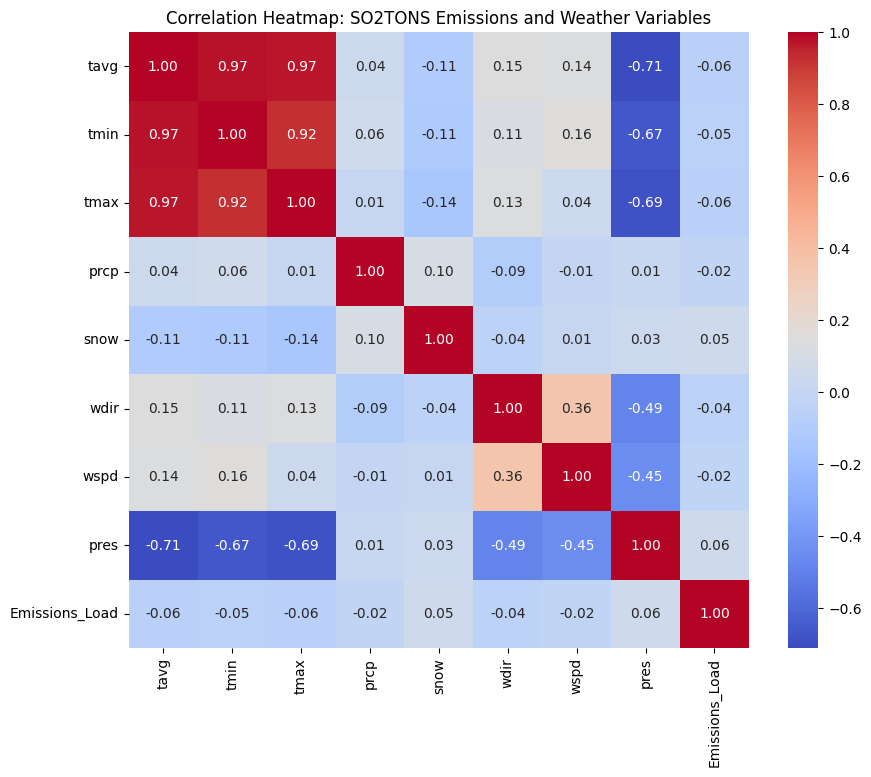


Feature Importances:
  Feature  Importance
6    wspd    0.233578
2    tmax    0.168250
7    pres    0.166356
5    wdir    0.161624
0    tavg    0.145878
1    tmin    0.106746
3    prcp    0.017191
4    snow    0.000376


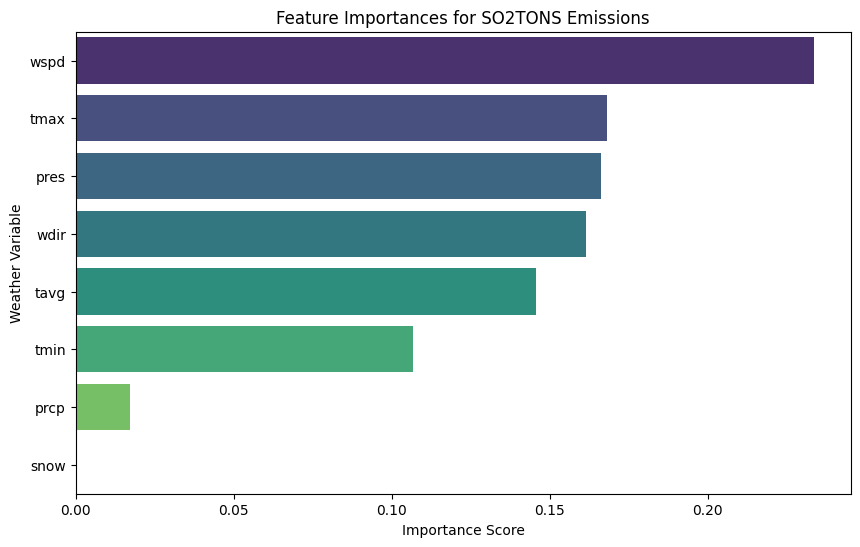


Analyzing NOXTONS Dataset

Correlation with Emissions_Load:
Emissions_Load    1.000000
pres              0.044929
wspd              0.011470
snow              0.006306
prcp             -0.010200
wdir             -0.030557
tmin             -0.034908
tavg             -0.036913
tmax             -0.039378
Name: Emissions_Load, dtype: float64


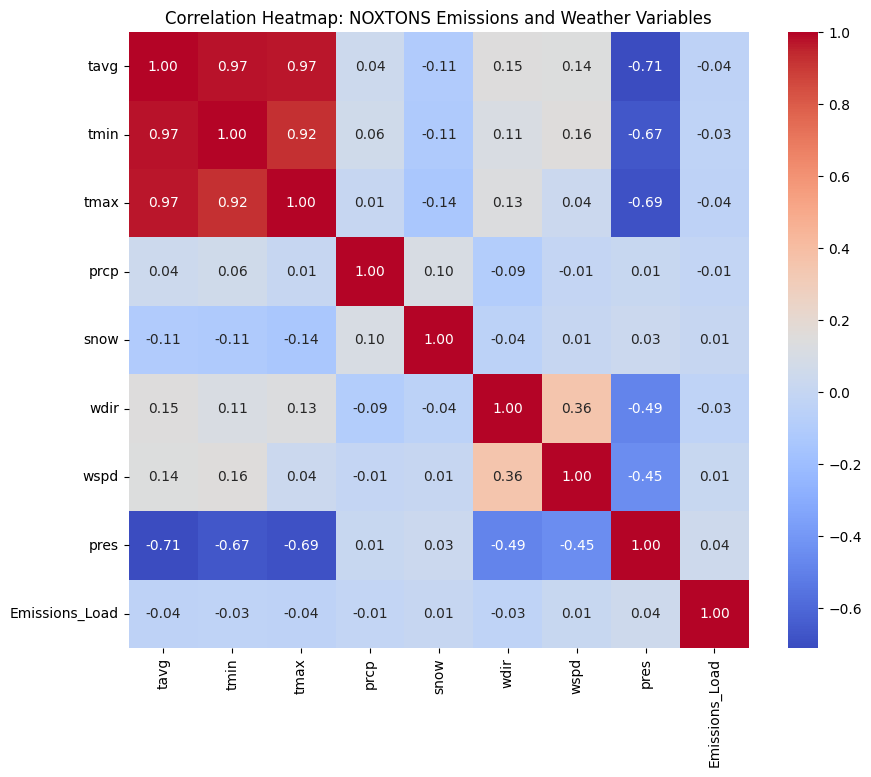


Feature Importances:
  Feature  Importance
6    wspd    0.329048
7    pres    0.254277
5    wdir    0.127889
0    tavg    0.115659
1    tmin    0.099502
2    tmax    0.069744
3    prcp    0.003846
4    snow    0.000035


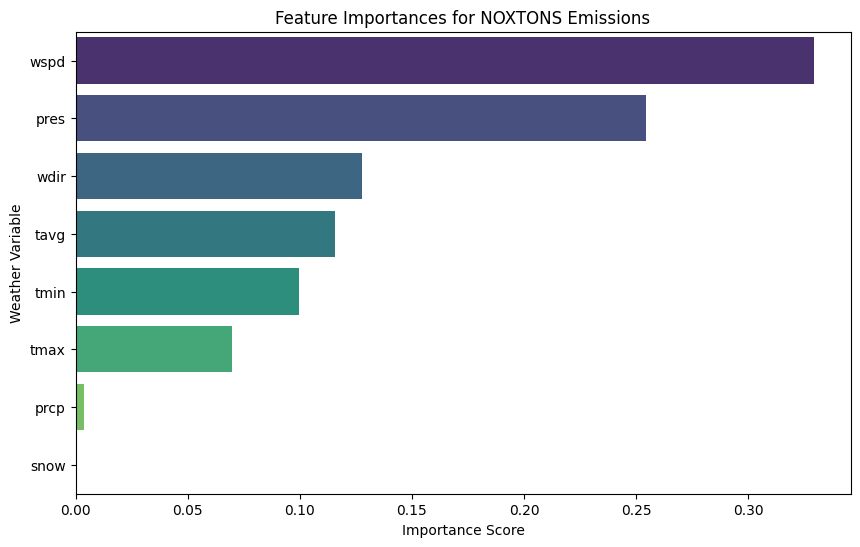


Analyzing COTONS Dataset

Correlation with Emissions_Load:
Emissions_Load    1.000000
pres              0.052174
wspd              0.010171
snow             -0.001227
prcp             -0.009512
wdir             -0.031018
tmin             -0.049409
tavg             -0.050756
tmax             -0.051454
Name: Emissions_Load, dtype: float64


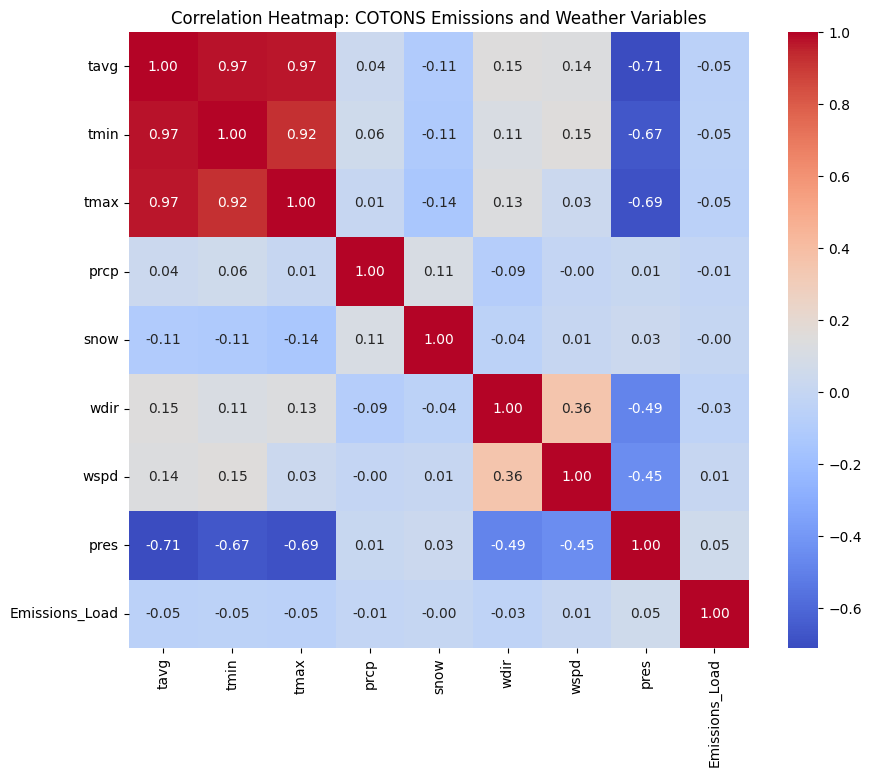


Feature Importances:
  Feature  Importance
6    wspd    0.294413
7    pres    0.219226
5    wdir    0.206357
0    tavg    0.126290
1    tmin    0.083955
2    tmax    0.065792
3    prcp    0.003963
4    snow    0.000005


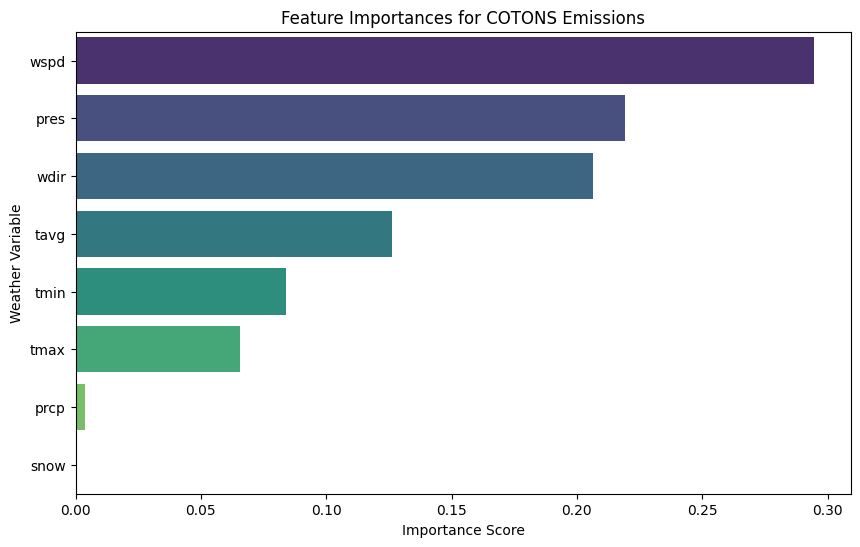

In [8]:
#
# Feature Importance
#

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Ensure plots display within the notebook
%matplotlib inline

# URLs for datasets
datasets = {
    "SO2TONS": "https://raw.githubusercontent.com/apownukepcc/ForecastingDailyEmissions/refs/heads/main/SO2TONS_dataset.csv",
    "NOXTONS": "https://raw.githubusercontent.com/apownukepcc/ForecastingDailyEmissions/refs/heads/main/NOXTONS_dataset.csv",
    "COTONS": "https://raw.githubusercontent.com/apownukepcc/ForecastingDailyEmissions/refs/heads/main/COTONS_dataset.csv"
}

# Loop through each dataset to perform analysis
for parameter, url in datasets.items():
    print(f"\nAnalyzing {parameter} Dataset")

    # Load the dataset
    data = pd.read_csv(url)

    # Convert 'date' column to datetime
    data['date'] = pd.to_datetime(data['date'])

    # Define predictors and target
    weather_features = ['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres']
    target = 'Emissions_Load'

    # Check if all required columns are present
    missing_cols = [col for col in weather_features + [target] if col not in data.columns]
    if missing_cols:
        print(f"Missing columns in {parameter} dataset: {missing_cols}. Skipping analysis for this dataset.")
        continue

    # Drop rows with missing values in predictors or target
    data = data.dropna(subset=weather_features + [target])

    # Ensure there is data left after dropping missing values
    if data.empty:
        print(f"No data available for {parameter} after dropping missing values. Skipping analysis for this dataset.")
        continue

    # Correlation Analysis
    correlation_matrix = data[weather_features + [target]].corr()
    correlation_with_target = correlation_matrix[target].sort_values(ascending=False)

    print("\nCorrelation with Emissions_Load:")
    print(correlation_with_target)

    # Display correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Correlation Heatmap: {parameter} Emissions and Weather Variables')
    plt.show()

    # Prepare data for Random Forest model
    X = data[weather_features]
    y = data[target]

    # Train Random Forest Model for Feature Importance
    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)

    # Extract feature importances
    feature_importances = pd.DataFrame({
        'Feature': weather_features,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    print("\nFeature Importances:")
    print(feature_importances)

    # Display feature importance bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
    plt.title(f'Feature Importances for {parameter} Emissions')
    plt.xlabel('Importance Score')
    plt.ylabel('Weather Variable')
    plt.show()


Explain Predictions: Provide explanations or a feature importance ranking showing which variables most influence emissions levels, highlighting the role of external weather conditions in emissions forecasts.

In [9]:
#
# Sample graphs
#

import pandas as pd
import matplotlib.pyplot as plt

# Define base URL for GitHub files
base_url = "https://raw.githubusercontent.com/apownukepcc/ForecastingDailyEmissions/refs/heads/main/"

# Define parameters and sources
parameters = ["SO2TONS", "NOXTONS", "COTONS"]
sources = ["LAKE-1", "LAKE-2", "LAKE-3", "LAKE-4"]

# Generate URLs for all combinations of parameters and sources
files = [
    (parameter, source, f"{base_url}{parameter}_{source}.csv")
    for parameter in parameters
    for source in sources
]

# Function to generate a graph for each parameter-source combination
def generate_graphs(files):
    for parameter, source, url in files:
        try:
            # Load the data from the URL
            data = pd.read_csv(url)

            # Check if necessary columns exist
            if "date" not in data.columns or "Value" not in data.columns:
                print(f"File {url} does not have the expected columns.")
                continue

            # Ensure the date column is in datetime format
            data['date'] = pd.to_datetime(data['date'])

            # Plot the data
            plt.figure(figsize=(12, 6))
            plt.plot(data['date'], data['Value'], marker='o', label=f'{parameter} Emissions ({source})')
            plt.title(f'{parameter} Emissions Over Time - {source}', fontsize=16)
            plt.xlabel('Date', fontsize=12)
            plt.ylabel('Emissions (Tons)', fontsize=12)
            plt.grid(True)
            plt.legend()

            # Display the graph
            plt.show()
            print(f"Graph for {parameter} - {source} displayed.")
        except Exception as e:
            print(f"Could not process file {url}. Error: {e}")

# Generate graphs for all the files
generate_graphs(files)


Output hidden; open in https://colab.research.google.com to view.